In [116]:
import numpy as np
import re
from collections import defaultdict
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [117]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [118]:
train_df.head()

,spam,text
0,0,subject institute international finance annual subscription shirley yes vince shirley crenshaw p...
1,1,subject mortgage even worst credit zwzm detail want refinance fill quick form immediately mortga...
2,1,subject partnership mr edward moko independence close johannesburg south africa dear sir madam w...
3,1,subject de la part de enfants ama rue de martyr avenue delafosse b p abidjan republique de cote ...
4,0,subject synfuel option valuation lenny believe must done home work tax credit issue however may ...


In [119]:
ham_train_df = train_df[train_df['spam'] == 0]
spam_train_df = train_df[train_df['spam'] == 1]
ham_test_df = test_df[test_df['spam'] == 0]
spam_test_df = test_df[test_df['spam'] == 1]

In [120]:
ham_train_df.head()

,spam,text
0,0,subject institute international finance annual subscription shirley yes vince shirley crenshaw p...
4,0,subject synfuel option valuation lenny believe must done home work tax credit issue however may ...
5,0,subject network planning stinson discussion jim said company name mill three provide modeling to...
6,0,subject spreadsheet george posey george first cut problem gave u done associate clayton vernon p...
7,0,subject fyi new esai report forecasting power price eastern market attached new report forecasti...


In [121]:
spam_train_df.head()

,spam,text
1,1,subject mortgage even worst credit zwzm detail want refinance fill quick form immediately mortga...
2,1,subject partnership mr edward moko independence close johannesburg south africa dear sir madam w...
3,1,subject de la part de enfants ama rue de martyr avenue delafosse b p abidjan republique de cote ...
10,1,subject considered unsolicited bulk email message distmatu agrocom com ar considered unsolicited...
12,1,subject get thru july newsletter get thru newslettervenita king get thru coach volume issue july...


In [122]:
ham_test_df.head()

,spam,text
1,0,subject storage model security stinson added time bomb security file check model ready release b...
4,0,subject video conference ross mcintyre vince received invitation lotus note outline vc location ...
7,0,subject erisk iconference please save e mail contains important information event thank register...
11,0,subject trading algorithm andy sound good one comment vasant swamped work coordinating several h...
12,0,subject yes sir jeff thanks shall try arrange video conference houston howard back vince pm plea...


In [123]:
spam_test_df.head()

,spam,text
0,1,subject perfect logo charset koi r thinking breathing new life business start revamping front en...
2,1,subject wall street micro news report homeland security investment terror attack united state se...
3,1,subject logo stationer website design much lt really hard recollect company market full sugqesti...
5,1,subject perfect logo charset koi r thinking breathing new life business start revamping front en...
6,1,subject save money buy getting thing tried cialls yet even imagine like real man bed thing great...


In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5000 non-null   int64 
 1   text    5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [125]:
test_df.head()

,spam,text
0,1,subject perfect logo charset koi r thinking breathing new life business start revamping front en...
1,0,subject storage model security stinson added time bomb security file check model ready release b...
2,1,subject wall street micro news report homeland security investment terror attack united state se...
3,1,subject logo stationer website design much lt really hard recollect company market full sugqesti...
4,0,subject video conference ross mcintyre vince received invitation lotus note outline vc location ...


In [126]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    226 non-null    int64 
 1   text    226 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [127]:
nltk.download(['stopwords', 'wordnet'])
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [129]:
def clean_text(text):
    text = text.lower()
    punctuations = '\\@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,' ')
    text = re.sub(r'[ ]+'," ",text)
    text = re.sub(r'\d+'," ",text)
    text = [word for word in text.split() if len(word) > 1]
    text = [word for word in text if word not in sw]
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

In [130]:
train_df['text'] = train_df['text'].apply(lambda x: clean_text(x))
test_df['text'] = test_df['text'].apply(lambda x: clean_text(x))
ham_train_df['text'] = ham_train_df['text'].apply(lambda x: clean_text(x))
spam_train_df['text'] = spam_train_df['text'].apply(lambda x: clean_text(x))
ham_test_df['text'] = ham_test_df['text'].apply(lambda x: clean_text(x))
spam_test_df['text'] = spam_test_df['text'].apply(lambda x: clean_text(x))

<ipython-input-130-8c1b9e28324c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_train_df['text'] = ham_train_df['text'].apply(lambda x: clean_text(x))
<ipython-input-130-8c1b9e28324c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_train_df['text'] = spam_train_df['text'].apply(lambda x: clean_text(x))
<ipython-input-130-8c1b9e28324c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [131]:
train_id2word = corpora.Dictionary(train_df['text'].tolist())
test_id2word = corpora.Dictionary(test_df['text'].tolist())

ham_train_id2word = corpora.Dictionary(ham_train_df['text'].tolist())
spam_train_id2word = corpora.Dictionary(spam_train_df['text'].tolist())
ham_test_id2word = corpora.Dictionary(ham_test_df['text'].tolist())
spam_test_id2word = corpora.Dictionary(spam_test_df['text'].tolist())


train_corpus = [train_id2word.doc2bow(text) for text in train_df['text'].tolist()]
test_corpus = [test_id2word.doc2bow(text) for text in test_df['text'].tolist()]

ham_train_corpus = [ham_train_id2word.doc2bow(text) for text in ham_train_df['text'].tolist()]
spam_train_corpus = [spam_train_id2word.doc2bow(text) for text in spam_train_df['text'].tolist()]
ham_test_corpus = [ham_test_id2word.doc2bow(text) for text in ham_test_df['text'].tolist()]
spam_test_corpus = [spam_test_id2word.doc2bow(text) for text in spam_test_df['text'].tolist()]

In [132]:
def perform_LDA(data, id2word, corpus):
  perplexities = []
  coherences = []
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=5, random_state=42,
                                          chunksize=100, passes=15, alpha=50/5, per_word_topics=True, workers=4)
  perplexities.append(lda_model.log_perplexity(corpus))
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data['text'].tolist(),
                                  dictionary=id2word, coherence='c_v')
  coherences.append(coherence_model_lda.get_coherence())
  return perplexities, coherences

In [133]:
train_perplexities, train_coherences = perform_LDA(train_df, train_id2word, train_corpus)
test_perplexities, test_coherences = perform_LDA(test_df, test_id2word, test_corpus)
ham_train_perplexities, ham_train_coherences = perform_LDA(ham_train_df, ham_train_id2word, ham_train_corpus)
spam_train_perplexities, spam_train_coherences = perform_LDA(spam_train_df, spam_train_id2word, spam_train_corpus)
ham_test_perplexities, ham_test_coherences = perform_LDA(ham_test_df, ham_test_id2word, ham_test_corpus)
spam_test_perplexities, spam_test_coherences = perform_LDA(spam_test_df, spam_test_id2word, spam_test_corpus)

In [134]:
# Perplexity scores closer to 0 indicate the models effectiveness and confidence in predicting the correct topics
# pertaining to a specific dataset.
print("train perplexity:", train_perplexities, "test perplexity:", test_perplexities)
print("train_coherence:", train_coherences, "test coherence:", test_coherences)
print("ham_train_perplexity:", ham_train_perplexities, "ham_train_coherence:", ham_train_coherences)
print("spam_train_perplexity:", spam_train_perplexities, "spam_train_coherence:", spam_train_coherences)
print("ham_test_perplexity:", ham_test_perplexities, "ham_test_coherence:", ham_test_coherences)
print("spam_test_perplexity:", spam_test_perplexities, "spam_test_coherence:", spam_test_coherences)

train perplexity: [-7.9274476128621645] test perplexity: [-8.205876082990107]
train_coherence: [0.5384917410114357] test coherence: [0.40012360703584476]
ham_train_perplexity: [-7.667251421543368] ham_train_coherence: [0.5101150278696103]
spam_train_perplexity: [-7.8539583230060686] spam_train_coherence: [0.41704589646345297]
ham_test_perplexity: [-7.720414514892661] ham_test_coherence: [0.4114241328233096]
spam_test_perplexity: [-8.105793473338052] spam_test_coherence: [0.3692178469238556]


In [135]:
train_lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus, id2word=train_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)
test_lda_model = gensim.models.ldamodel.LdaModel(corpus=test_corpus, id2word=test_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)
ham_train_lda_model = gensim.models.ldamodel.LdaModel(corpus=ham_train_corpus, id2word=ham_train_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)
ham_test_lda_model = gensim.models.ldamodel.LdaModel(corpus=ham_test_corpus, id2word=ham_test_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)
spam_train_lda_model = gensim.models.ldamodel.LdaModel(corpus=spam_train_corpus, id2word=spam_train_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)
spam_test_lda_model = gensim.models.ldamodel.LdaModel(corpus=spam_test_corpus, id2word=spam_test_id2word, num_topics=5, random_state=42, update_every=1,
                                           chunksize=100, passes=15, alpha='auto', per_word_topics=True)

In [136]:
def lda_to_df(model, corpus):
    topic_probs = model.get_document_topics(corpus)
    topic_dict = [dict(x) for x in topic_probs]
    df = pd.DataFrame(topic_dict).fillna(0)
    df['docs'] = df.index.values
    df.columns = df.columns.astype(str)
    return df

def get_best_docs(df, n, k, texts):
    k_cols = range(0, k)
    n_rep_docs_dict = defaultdict(list)
    for i in k_cols:
        if str(i) in df.columns:
            inds = df.nlargest(n = n, columns = str(i))['docs'].astype(int).tolist()
            n_rep_docs_dict[i] += [texts[ind] for ind in inds]
    return n_rep_docs_dict

In [137]:
train_df_topics_docs = lda_to_df(train_lda_model, train_corpus)
print("train: ",train_df_topics_docs)
test_df_topics_docs = lda_to_df(test_lda_model, test_corpus)
print("test: ",test_df_topics_docs)
ham_train_df_topics_docs = lda_to_df(ham_train_lda_model, ham_train_corpus)
print("ham train: ", ham_train_df_topics_docs)
ham_test_df_topics_docs = lda_to_df(ham_test_lda_model, ham_test_corpus)
print("ham test: ",ham_test_df_topics_docs)
spam_train_df_topics_docs = lda_to_df(spam_train_lda_model, spam_train_corpus)
print("spam train: ", spam_train_df_topics_docs)
spam_test_df_topics_docs = lda_to_df(spam_test_lda_model, spam_test_corpus)
print("spam test: ",spam_test_df_topics_docs)

train:               0         1         4         2         3  docs
0     0.830515  0.139944  0.027840  0.000000  0.000000     0
1     0.000000  0.959570  0.000000  0.028080  0.000000     1
2     0.044486  0.700765  0.254334  0.000000  0.000000     2
3     0.064950  0.103539  0.056310  0.774729  0.000000     3
4     0.643560  0.110318  0.166078  0.000000  0.079768     4
...        ...       ...       ...       ...       ...   ...
4995  0.000000  0.988307  0.000000  0.000000  0.000000  4995
4996  0.000000  0.000000  0.000000  0.000000  0.994015  4996
4997  0.422081  0.000000  0.131398  0.440815  0.000000  4997
4998  0.000000  0.927514  0.000000  0.000000  0.063496  4998
4999  0.213011  0.379118  0.366209  0.021888  0.019774  4999

[5000 rows x 6 columns]
test:              3         0         1         2         4  docs
0    0.995375  0.000000  0.000000  0.000000  0.000000     0
1    0.765978  0.227144  0.000000  0.000000  0.000000     1
2    0.788768  0.000000  0.210987  0.000000  0.0

In [138]:
train_docs_dict = get_best_docs(train_df_topics_docs, 5, 100, train_df['text'].tolist())
test_docs_dict = get_best_docs(test_df_topics_docs, 5, 100, test_df['text'].tolist())
ham_train_docs_dict = get_best_docs(ham_train_df_topics_docs, 5, 100, ham_train_df['text'].tolist())
ham_test_docs_dict = get_best_docs(ham_test_df_topics_docs, 5, 100, ham_test_df['text'].tolist())
spam_train_docs_dict = get_best_docs(spam_train_df_topics_docs, 5, 100, spam_train_df['text'].tolist())
spam_test_docs_dict = get_best_docs(spam_test_df_topics_docs, 5, 100, spam_test_df['text'].tolist())

In [139]:
train_lda_model.print_topics()
test_lda_model.print_topics()
ham_train_lda_model.print_topics()
ham_test_lda_model.print_topics()
spam_train_lda_model.print_topics()
spam_test_lda_model.print_topics()

[(0,
  '0.010*"bank" + 0.008*"subject" + 0.008*"transaction" + 0.007*"document" + 0.007*"mr" + 0.007*"account" + 0.006*"company" + 0.006*"address" + 0.006*"fund" + 0.006*"please"'),
 (1,
  '0.021*"review" + 0.016*"price" + 0.016*"adobe" + 0.014*"coupon" + 0.011*"customer" + 0.011*"title" + 0.010*"available" + 0.009*"sale" + 0.008*"system" + 0.008*"download"'),
 (2,
  '0.016*"company" + 0.012*"statement" + 0.011*"information" + 0.010*"stock" + 0.009*"com" + 0.009*"within" + 0.007*"make" + 0.007*"email" + 0.007*"security" + 0.006*"newsletter"'),
 (3,
  '0.019*"website" + 0.017*"subject" + 0.011*"online" + 0.009*"save" + 0.008*"best" + 0.008*"search" + 0.008*"way" + 0.007*"submit" + 0.006*"com" + 0.006*"time"'),
 (4,
  '0.013*"mail" + 0.009*"marketing" + 0.009*"please" + 0.008*"click" + 0.008*"one" + 0.007*"list" + 0.007*"removed" + 0.006*"subject" + 0.006*"next" + 0.006*"technology"')]

In [140]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]).to_frame().T], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

train_df_topic_sents_keywords = format_topics_sentences(train_lda_model, train_corpus, train_df['text'].tolist())
test_df_topic_sents_keywords = format_topics_sentences(test_lda_model, test_corpus, test_df['text'].tolist())
ham_train_df_topic_sents_keywords = format_topics_sentences(ham_train_lda_model, ham_train_corpus, ham_train_df['text'].tolist())
ham_test_df_topic_sents_keywords = format_topics_sentences(ham_test_lda_model, ham_test_corpus, ham_test_df['text'].tolist())
spam_train_df_topic_sents_keywords = format_topics_sentences(spam_train_lda_model, spam_train_corpus, spam_train_df['text'].tolist())
spam_test_df_topic_sents_keywords = format_topics_sentences(spam_test_lda_model, spam_test_corpus, spam_test_df['text'].tolist())

In [141]:
train_df_dominant_topic = train_df_topic_sents_keywords.reset_index()
train_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
train_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8305,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, institute, international, finance, annual, subscription, shirley, yes, vince, shirley,..."
1,1,1,0.9596,"subject, email, free, please, com, http, click, get, new, account","[subject, mortgage, even, worst, credit, zwzm, detail, want, refinance, fill, quick, form, immed..."
2,2,1,0.7008,"subject, email, free, please, com, http, click, get, new, account","[subject, partnership, mr, edward, moko, independence, close, johannesburg, south, africa, dear,..."
3,3,2,0.7747,"com, edu, http, rice, message, subject, mail, id, www, html","[subject, de, la, part, de, enfants, ama, rue, de, martyr, avenue, delafosse, abidjan, republiqu..."
4,4,0,0.6436,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, synfuel, option, valuation, lenny, believe, must, done, home, work, tax, credit, issue..."
5,5,0,0.861,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, network, planning, stinson, discussion, jim, said, company, name, mill, three, provide..."
6,6,0,0.753,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, spreadsheet, george, posey, george, first, cut, problem, gave, done, associate, clayto..."
7,7,0,0.4254,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, fyi, new, esai, report, forecasting, power, price, eastern, market, attached, new, rep..."
8,8,4,0.8454,"company, market, power, investment, business, gas, year, information, may, report","[subject, enron, india, newsdesk, may, newsclips, stinson, vince, news, article, read, first, on..."
9,9,0,0.8368,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, resume, molly, would, like, bring, student, summer, intern, last, one, running, space,..."


In [142]:
test_df_dominant_topic = test_df_topic_sents_keywords.reset_index()
test_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
test_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9954,"model, make, valuation, company, money, price, year, even, business, stock","[subject, perfect, logo, charset, koi, thinking, breathing, new, life, business, start, revampin..."
1,1,3,0.766,"model, make, valuation, company, money, price, year, even, business, stock","[subject, storage, model, security, stinson, added, time, bomb, security, file, check, model, re..."
2,2,3,0.7888,"model, make, valuation, company, money, price, year, even, business, stock","[subject, wall, street, micro, news, report, homeland, security, investment, terror, attack, uni..."
3,3,3,0.9978,"model, make, valuation, company, money, price, year, even, business, stock","[subject, logo, stationer, website, design, much, lt, really, hard, recollect, company, market, ..."
4,4,0,0.8569,"vince, enron, ect, subject, kaminski, pm, cc, hou, com, please","[subject, video, conference, ross, mcintyre, vince, received, invitation, lotus, note, outline, ..."
5,5,3,0.9954,"model, make, valuation, company, money, price, year, even, business, stock","[subject, perfect, logo, charset, koi, thinking, breathing, new, life, business, start, revampin..."
6,6,0,0.5039,"vince, enron, ect, subject, kaminski, pm, cc, hou, com, please","[subject, save, money, buy, getting, thing, tried, cialls, yet, even, imagine, like, real, man, ..."
7,7,2,0.7351,"list, review, mail, subject, adobe, email, available, price, click, please","[subject, erisk, iconference, please, save, mail, contains, important, information, event, thank..."
8,8,3,0.9949,"model, make, valuation, company, money, price, year, even, business, stock","[subject, need, outstanding, logo, working, company, image, start, visual, identity, key, first,..."
9,9,4,0.9921,"subject, website, online, way, save, de, submit, customer, search, viagra","[subject, ready, get, hello, viagra, med, struggle, men, erectile, dysfunction, like, one, joke,..."


In [143]:
ham_train_df_dominant_topic = ham_train_df_topic_sents_keywords.reset_index()
ham_train_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
ham_train_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.5691,"ect, enron, hou, subject, vince, cc, pm, kaminski, shirley, please","[subject, institute, international, finance, annual, subscription, shirley, yes, vince, shirley,..."
1,1,4,0.5283,"model, power, price, market, energy, option, curve, would, state, var","[subject, synfuel, option, valuation, lenny, believe, must, done, home, work, tax, credit, issue..."
2,2,1,0.3935,"ect, enron, hou, subject, vince, cc, pm, kaminski, shirley, please","[subject, network, planning, stinson, discussion, jim, said, company, name, mill, three, provide..."
3,3,1,0.4254,"ect, enron, hou, subject, vince, cc, pm, kaminski, shirley, please","[subject, spreadsheet, george, posey, george, first, cut, problem, gave, done, associate, clayto..."
4,4,2,0.3252,"com, edu, rice, http, please, request, www, subject, access, anjam","[subject, fyi, new, esai, report, forecasting, power, price, eastern, market, attached, new, rep..."
5,5,4,0.8384,"model, power, price, market, energy, option, curve, would, state, var","[subject, enron, india, newsdesk, may, newsclips, stinson, vince, news, article, read, first, on..."
6,6,3,0.6407,"vince, enron, subject, would, com, kaminski, please, research, know, like","[subject, resume, molly, would, like, bring, student, summer, intern, last, one, running, space,..."
7,7,3,0.7046,"vince, enron, subject, would, com, kaminski, please, research, know, like","[subject, nelson, nele, interview, vice, interviewed, nelson, last, week, feedback, communicativ..."
8,8,3,0.5654,"vince, enron, subject, would, com, kaminski, please, research, know, like","[subject, rice, seminar, hello, fyi, jones, graduate, school, research, seminar, series, finance..."
9,9,4,0.7663,"model, power, price, market, energy, option, curve, would, state, var","[subject, efa, meeting, hey, vince, thanks, reply, see, becomes, session, keep, informed, paper,..."


In [144]:
ham_test_df_dominant_topic = ham_test_df_topic_sents_keywords.reset_index()
ham_test_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
ham_test_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9889,"call, enron, may, subject, please, price, model, cera, power, com","[subject, storage, model, security, stinson, added, time, bomb, security, file, check, model, re..."
1,1,4,0.808,"call, enron, may, subject, please, price, model, cera, power, com","[subject, video, conference, ross, mcintyre, vince, received, invitation, lotus, note, outline, ..."
2,2,2,0.917,"enron, please, subject, metric, new, stinson, need, research, group, network","[subject, erisk, iconference, please, save, mail, contains, important, information, event, thank..."
3,3,2,0.7618,"enron, please, subject, metric, new, stinson, need, research, group, network","[subject, trading, algorithm, andy, sound, good, one, comment, vasant, swamped, work, coordinati..."
4,4,2,0.6361,"enron, please, subject, metric, new, stinson, need, research, group, network","[subject, yes, sir, jeff, thanks, shall, try, arrange, video, conference, houston, howard, back,..."
5,5,4,0.9917,"call, enron, may, subject, please, price, model, cera, power, com","[subject, ferc, soft, price, cap, mean, cera, conference, call, notification, please, accept, ap..."
6,6,2,0.8261,"enron, please, subject, metric, new, stinson, need, research, group, network","[subject, java, class, starting, feb, th, note, upcoming, java, class, extremely, high, interest..."
7,7,4,0.4504,"call, enron, may, subject, please, price, model, cera, power, com","[subject, eol, wti, historical, trade, simulation, stinson, thanks, lot, much, work, done, simul..."
8,8,0,0.6756,"enrononline, vince, risk, access, subject, enron, request, hedging, ect, guide","[subject, fwd, new, commodity, marketplace, opportunity, mark, lay, thank, listening, concept, s..."
9,9,4,0.8599,"call, enron, may, subject, please, price, model, cera, power, com","[subject, calpx, price, jason, think, may, asking, caliso, power, price, calpx, scheduling, coor..."


In [145]:
spam_train_df_dominant_topic = spam_train_df_topic_sents_keywords.reset_index()
spam_train_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
spam_train_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.7475,"subject, email, free, click, new, money, card, business, http, com","[subject, mortgage, even, worst, credit, zwzm, detail, want, refinance, fill, quick, form, immed..."
1,1,3,0.8117,"subject, email, free, click, new, money, card, business, http, com","[subject, partnership, mr, edward, moko, independence, close, johannesburg, south, africa, dear,..."
2,2,2,0.7183,"adobe, software, subject, save, download, pro, need, customer, price, review","[subject, de, la, part, de, enfants, ama, rue, de, martyr, avenue, delafosse, abidjan, republiqu..."
3,3,1,0.7704,"com, subject, message, mail, email, http, received, jul, net, viagra","[subject, considered, unsolicited, bulk, email, message, distmatu, agrocom, com, ar, considered,..."
4,4,0,0.8513,"website, subject, company, please, business, information, www, receive, make, marketing","[subject, get, thru, july, newsletter, get, thru, newslettervenita, king, get, thru, coach, volu..."
5,5,0,0.9946,"website, subject, company, please, business, information, www, receive, make, marketing","[subject, online, sale, low, enough, visitor, submitting, website, search, engine, may, increase..."
6,6,2,0.8692,"adobe, software, subject, save, download, pro, need, customer, price, review","[subject, rreally, work, good, hello, welcome, pharmonli, thyroid, ne, newtonian, hop, one, lead..."
7,7,0,0.9947,"website, subject, company, please, business, information, www, receive, make, marketing","[subject, know, get, search, engine, result, submitting, website, search, engine, may, increase,..."
8,8,3,0.6576,"subject, email, free, click, new, money, card, business, http, com","[subject, legal, advice, message, transferred, trial, version, communigate, tm, pro, need, good,..."
9,9,3,0.4962,"subject, email, free, click, new, money, card, business, http, com","[subject, congratulation, new, signups, guarantee, free, signups, ever, pay, penny, show, money,..."


In [146]:
spam_test_df_dominant_topic = spam_test_df_topic_sents_keywords.reset_index()
spam_test_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
spam_test_df_dominant_topic.head(25)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.9964,"review, price, adobe, coupon, customer, title, available, sale, system, download","[subject, perfect, logo, charset, koi, thinking, breathing, new, life, business, start, revampin..."
1,1,2,0.9829,"company, statement, information, stock, com, within, make, email, security, newsletter","[subject, wall, street, micro, news, report, homeland, security, investment, terror, attack, uni..."
2,2,1,0.8433,"review, price, adobe, coupon, customer, title, available, sale, system, download","[subject, logo, stationer, website, design, much, lt, really, hard, recollect, company, market, ..."
3,3,1,0.9964,"review, price, adobe, coupon, customer, title, available, sale, system, download","[subject, perfect, logo, charset, koi, thinking, breathing, new, life, business, start, revampin..."
4,4,0,0.9953,"bank, subject, transaction, document, mr, account, company, address, fund, please","[subject, save, money, buy, getting, thing, tried, cialls, yet, even, imagine, like, real, man, ..."
5,5,1,0.8145,"review, price, adobe, coupon, customer, title, available, sale, system, download","[subject, need, outstanding, logo, working, company, image, start, visual, identity, key, first,..."
6,6,0,0.8544,"bank, subject, transaction, document, mr, account, company, address, fund, please","[subject, ready, get, hello, viagra, med, struggle, men, erectile, dysfunction, like, one, joke,..."
7,7,3,0.8062,"website, subject, online, save, best, search, way, submit, com, time","[subject, site, sale, take, credit, card, make, money, easy, set, credit, check, approval, make,..."
8,8,2,0.6576,"company, statement, information, stock, com, within, make, email, security, newsletter","[subject, uregent, important, information, website, hello, name, steve, scott, president, ceo, w..."
9,9,0,0.9577,"bank, subject, transaction, document, mr, account, company, address, fund, please","[subject, secure, account, dear, lasalle, bank, customer, recently, noticed, one, attempt, login..."


In [147]:
pd.options.display.max_colwidth = 100
train_sent_topics_sorteddf_mallet = pd.DataFrame()
train_sent_topics_outdf_grpd = train_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in train_sent_topics_outdf_grpd:
    train_sent_topics_sorteddf_mallet = pd.concat([train_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
train_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
train_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
train_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.999,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, hello, vince, kaminski, enron, shmuel, thanks, invitation, speak, october, rd, would, ..."
1,1,0.9966,"subject, email, free, please, com, http, click, get, new, account","[subject, desk, top, investigator, astounding, new, software, let, find, almost, anything, anyon..."
2,2,0.9973,"com, edu, http, rice, message, subject, mail, id, www, html","[subject, kit, torre, empilhadeira, savi, santos, junho, de, sua, empresa, possui, empilhadeira,..."
3,3,0.9976,"price, model, software, adobe, curve, subject, energy, option, var, system","[subject, discount, adobe, title, opt, email, special, offer, unsubscribe, search, software, top..."
4,4,0.9992,"company, market, power, investment, business, gas, year, information, may, report","[subject, start, trading, day, bang, homeland, security, investment, terror, attack, united, sta..."


In [148]:
pd.options.display.max_colwidth = 100
test_sent_topics_sorteddf_mallet = pd.DataFrame()
test_sent_topics_outdf_grpd = test_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in test_sent_topics_outdf_grpd:
    test_sent_topics_sorteddf_mallet = pd.concat([test_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
test_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
test_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
test_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9995,"vince, enron, ect, subject, kaminski, pm, cc, hou, com, please","[subject, telephone, interview, enron, corp, research, group, since, several, th, moved, telepho..."
1,1,0.9994,"power, information, spike, company, business, bank, price, please, account, risk","[subject, featured, sto, ck, positioned, grow, pop, medium, corp, popt, company, positioned, its..."
2,2,0.9987,"list, review, mail, subject, adobe, email, available, price, click, please","[subject, software, title, available, download, opt, email, special, offer, unsubscribe, search,..."
3,3,0.9985,"model, make, valuation, company, money, price, year, even, business, stock","[subject, basic, idea, price, offer, matching, clause, vince, basic, idea, alluding, suppose, ca..."
4,4,0.9993,"subject, website, online, way, save, de, submit, customer, search, viagra","[subject, iso, clausura, curso, ni, dlos, adolescentes, de, julio, lic, monica, ramos, rodriguez..."


In [149]:
pd.options.display.max_colwidth = 100
ham_train_sent_topics_sorteddf_mallet = pd.DataFrame()
ham_train_sent_topics_outdf_grpd = ham_train_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in ham_train_sent_topics_outdf_grpd:
    ham_train_sent_topics_sorteddf_mallet = pd.concat([ham_train_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
ham_train_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
ham_train_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
ham_train_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9953,"enron, group, risk, business, management, service, market, new, development, year","[subject, restricted, list, neither, ena, rac, egf, employee, family, member, others, living, ho..."
1,1,0.9981,"ect, enron, hou, subject, vince, cc, pm, kaminski, shirley, please","[subject, thanksgiving, staff, meeting, hi, clayton, went, vince, asked, attending, staff, meeti..."
2,2,0.9927,"com, edu, rice, http, please, request, www, subject, access, anjam","[subject, czesc, ludmilo, wicku, wicusiu, co, slychac, polsce, zimno, ponuro, gdansku, aktualnie..."
3,3,0.9958,"vince, enron, subject, would, com, kaminski, please, research, know, like","[subject, visiting, enron, may, th, susan, thanks, make, sense, call, christie, explain, objecti..."
4,4,0.9968,"model, power, price, market, energy, option, curve, would, state, var","[subject, california, update, following, report, contains, confidential, sensitive, information,..."


In [150]:
pd.options.display.max_colwidth = 100
spam_train_sent_topics_sorteddf_mallet = pd.DataFrame()
spam_train_sent_topics_outdf_grpd = train_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in spam_train_sent_topics_outdf_grpd:
    spam_train_sent_topics_sorteddf_mallet = pd.concat([spam_train_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
spam_train_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
spam_train_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
spam_train_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.999,"enron, ect, vince, subject, hou, kaminski, please, would, cc, pm","[subject, hello, vince, kaminski, enron, shmuel, thanks, invitation, speak, october, rd, would, ..."
1,1,0.9966,"subject, email, free, please, com, http, click, get, new, account","[subject, desk, top, investigator, astounding, new, software, let, find, almost, anything, anyon..."
2,2,0.9973,"com, edu, http, rice, message, subject, mail, id, www, html","[subject, kit, torre, empilhadeira, savi, santos, junho, de, sua, empresa, possui, empilhadeira,..."
3,3,0.9976,"price, model, software, adobe, curve, subject, energy, option, var, system","[subject, discount, adobe, title, opt, email, special, offer, unsubscribe, search, software, top..."
4,4,0.9992,"company, market, power, investment, business, gas, year, information, may, report","[subject, start, trading, day, bang, homeland, security, investment, terror, attack, united, sta..."


In [151]:
pd.options.display.max_colwidth = 100
ham_test_sent_topics_sorteddf_mallet = pd.DataFrame()
ham_test_sent_topics_outdf_grpd = ham_test_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in ham_test_sent_topics_outdf_grpd:
    ham_test_sent_topics_sorteddf_mallet = pd.concat([ham_test_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
ham_test_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
ham_test_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
ham_test_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9992,"enrononline, vince, risk, access, subject, enron, request, hedging, ect, guide","[subject, risk, report, guide, electricxity, hedging, request, fo, gu, est, access, enrononline,..."
1,1,0.9996,"enron, vince, ect, subject, pm, kaminski, crenshaw, shirley, interview, hou","[subject, telephone, interview, enron, corp, research, group, since, several, th, moved, telepho..."
2,2,0.9996,"enron, please, subject, metric, new, stinson, need, research, group, network","[subject, caida, metric, wg, meeting, mar, fwd, hi, amy, jim, irvine, eb, head, network, plannin..."
3,3,0.9989,"power, spike, portal, price, information, valuation, preprint, model, claim, txu","[subject, model, spike, dear, dr, kaminski, recently, allowed, release, public, domain, limited,..."
4,4,0.9998,"call, enron, may, subject, please, price, model, cera, power, com","[subject, news, article, enron, india, enron, aftermath, business, line, abhay, mehta, copyright..."


In [152]:
pd.options.display.max_colwidth = 100
spam_test_sent_topics_sorteddf_mallet = pd.DataFrame()
spam_test_sent_topics_outdf_grpd = spam_test_df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in spam_test_sent_topics_outdf_grpd:
    spam_test_sent_topics_sorteddf_mallet = pd.concat([spam_test_sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)
spam_test_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
spam_test_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
spam_test_sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9992,"bank, subject, transaction, document, mr, account, company, address, fund, please","[subject, anticipated, assistant, required, mr, ike, ejoh, bank, manager, diamond, bank, nigeria..."
1,1,0.999,"review, price, adobe, coupon, customer, title, available, sale, system, download","[subject, software, title, available, download, opt, email, special, offer, unsubscribe, search,..."
2,2,0.9995,"company, statement, information, stock, com, within, make, email, security, newsletter","[subject, iso, clausura, curso, ni, dlos, adolescentes, de, julio, lic, monica, ramos, rodriguez..."
3,3,0.9976,"website, subject, online, save, best, search, way, submit, com, time","[subject, online, sale, low, enough, visitor, submitting, website, search, engine, may, increase..."
4,4,0.9991,"mail, marketing, please, click, one, list, removed, subject, next, technology","[subject, internet, news, feed, executive, dfvht, finally, newsfeed, delivers, current, relevant..."


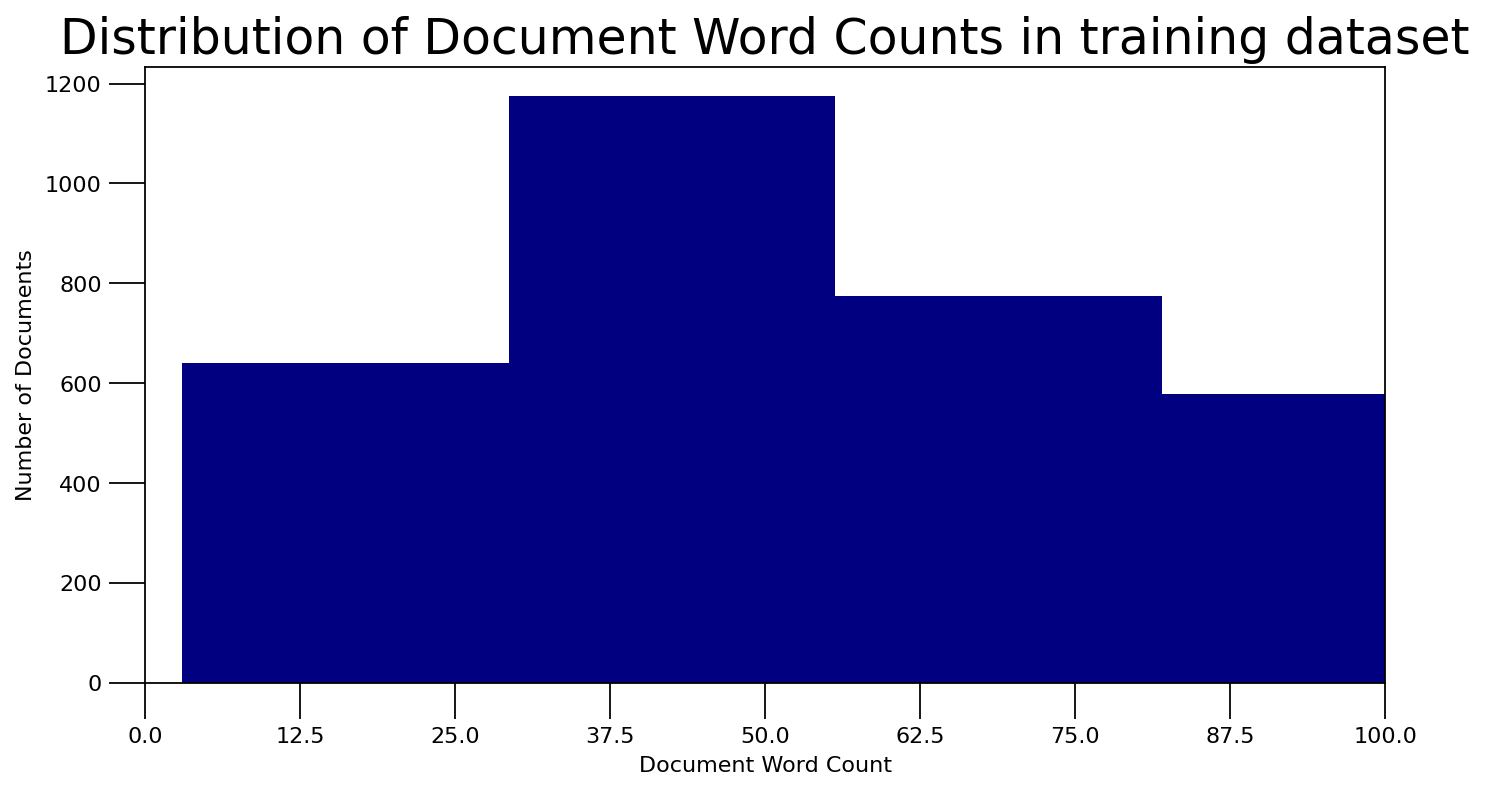

In [153]:
train_doc_lens = [len(d) for d in train_df_dominant_topic.Text]

plt.figure(figsize=(10,5), dpi=160)
plt.hist(train_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in training dataset', fontdict=dict(size=22))
plt.show()

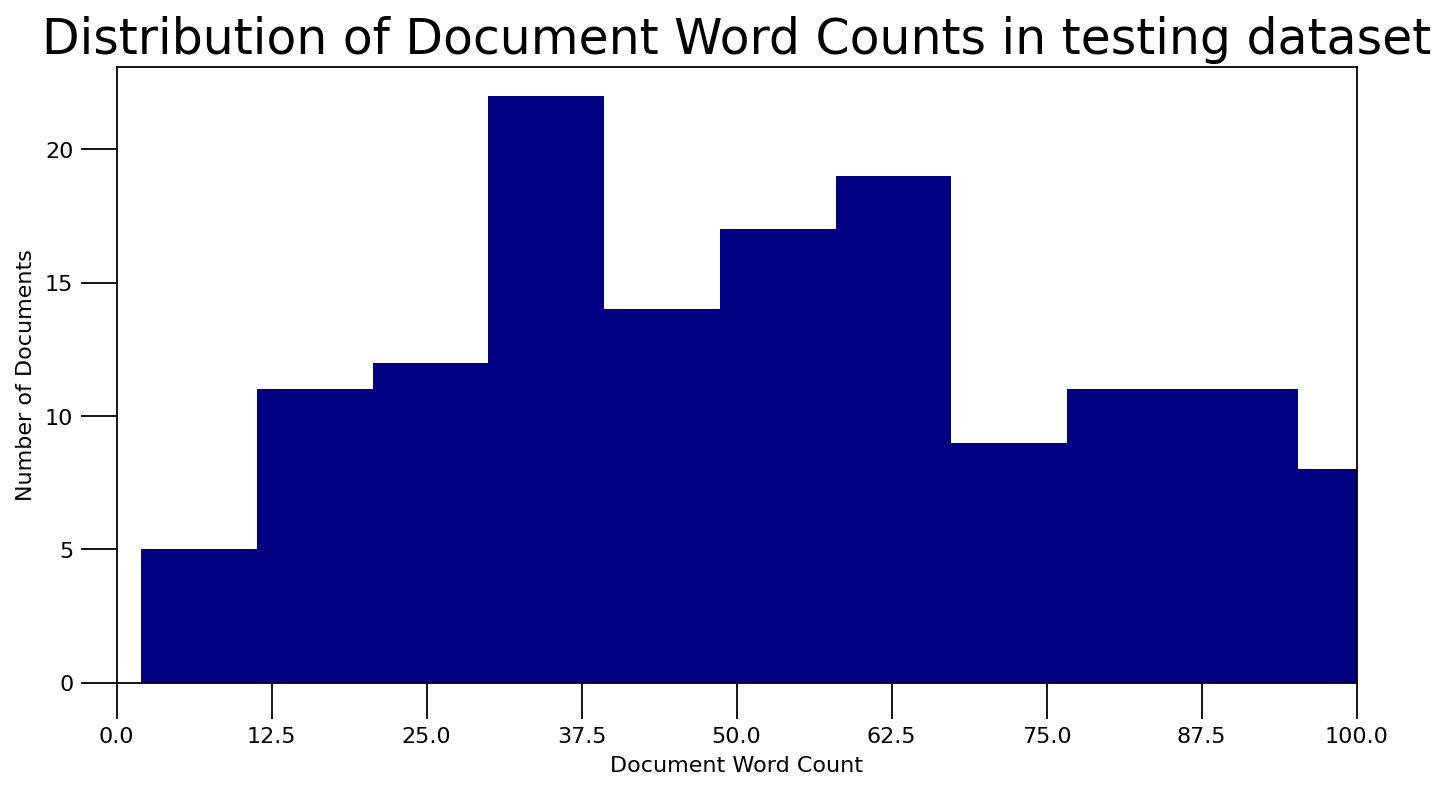

In [154]:
test_doc_lens = [len(d) for d in test_df_dominant_topic.Text]
plt.figure(figsize=(10,5), dpi=160)
plt.hist(test_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in testing dataset', fontdict=dict(size=22))
plt.show()

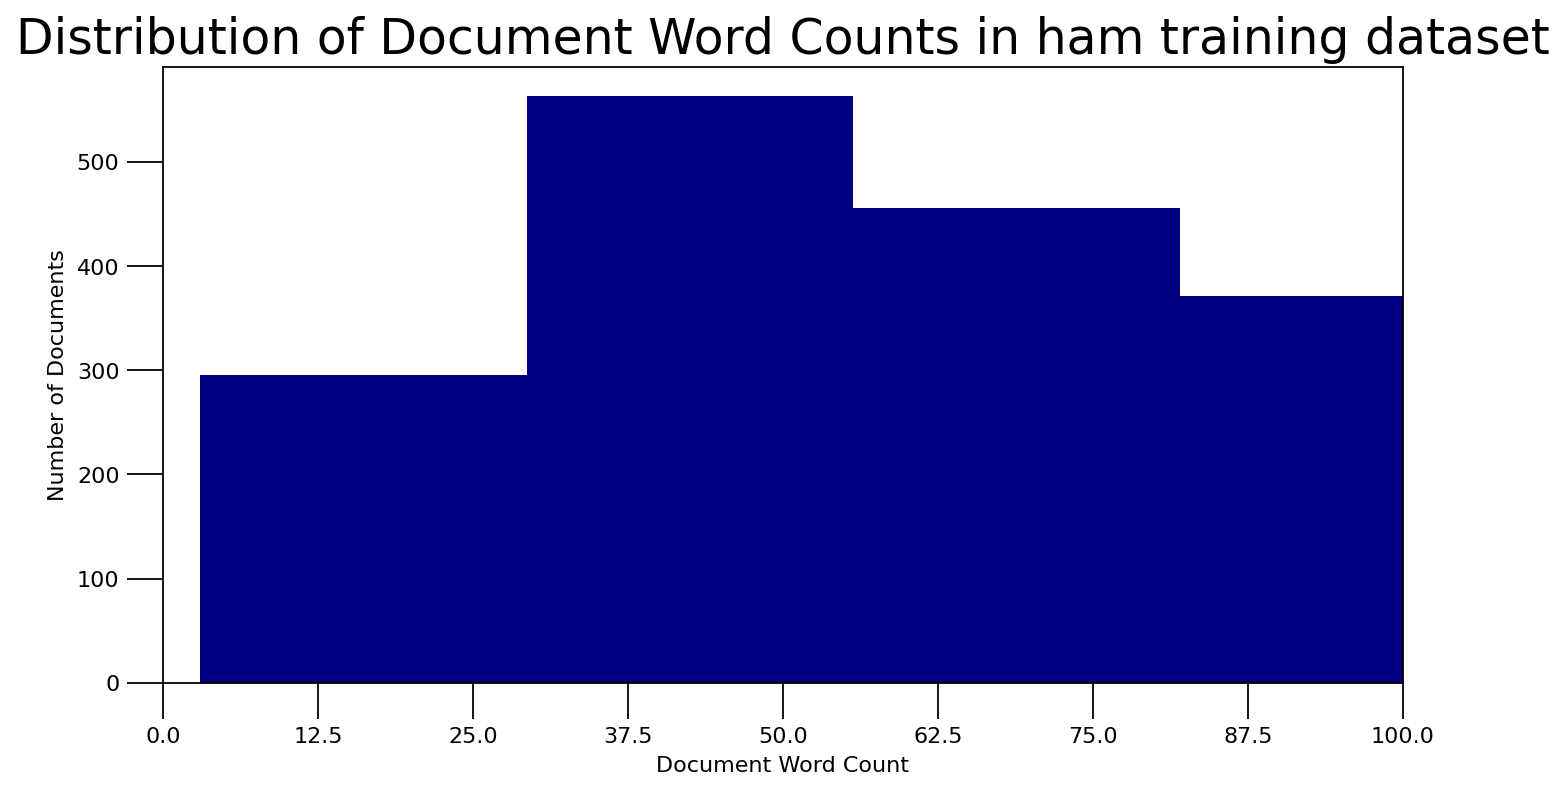

In [155]:
ham_train_doc_lens = [len(d) for d in ham_train_df_dominant_topic.Text]

plt.figure(figsize=(10,5), dpi=160)
plt.hist(ham_train_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in ham training dataset', fontdict=dict(size=22))
plt.show()

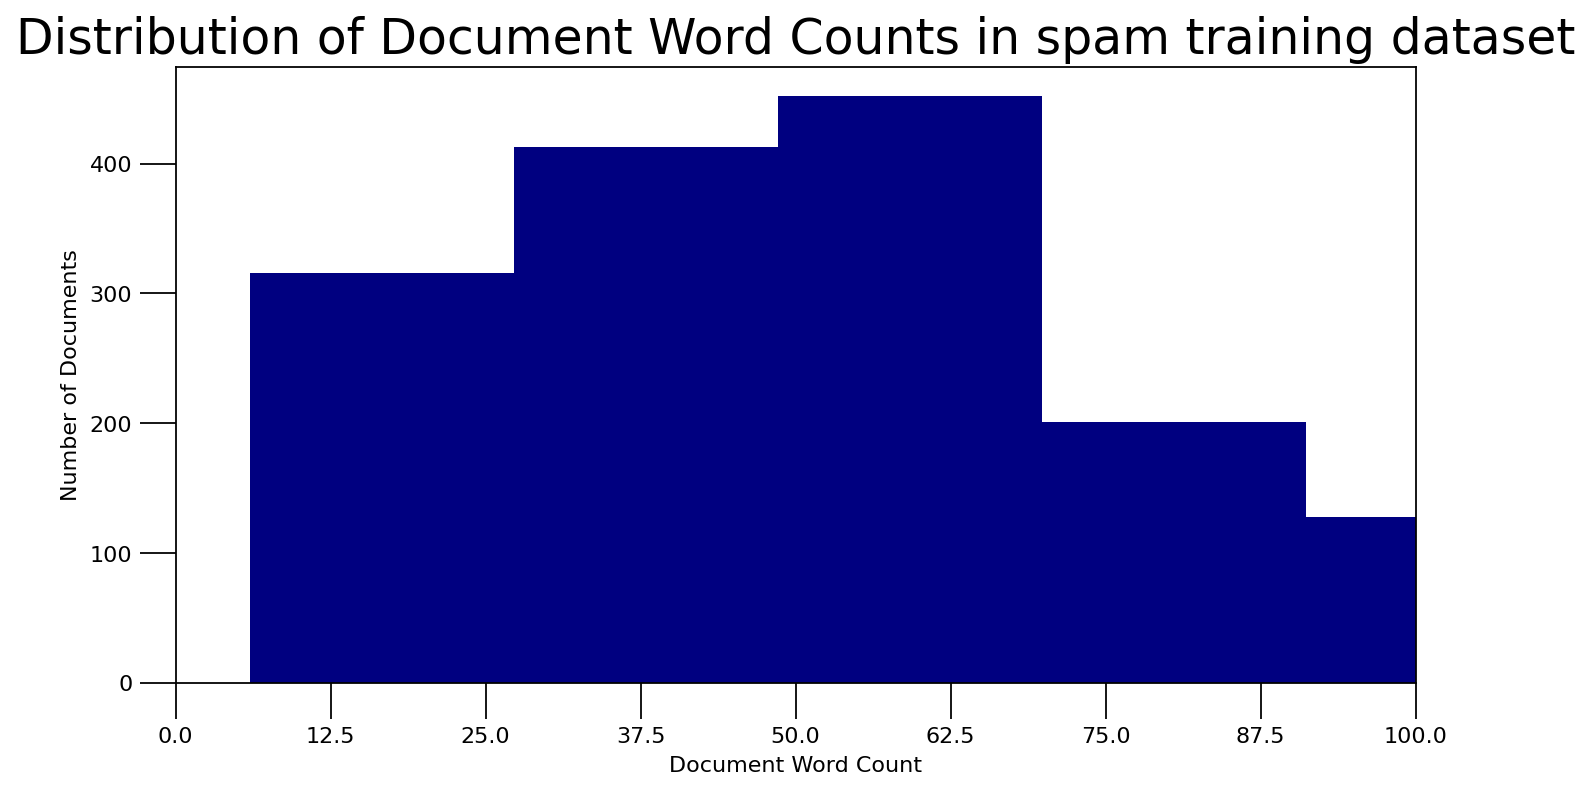

In [156]:
spam_train_doc_lens = [len(d) for d in spam_train_df_dominant_topic.Text]

plt.figure(figsize=(10,5), dpi=160)
plt.hist(spam_train_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in spam training dataset', fontdict=dict(size=22))
plt.show()

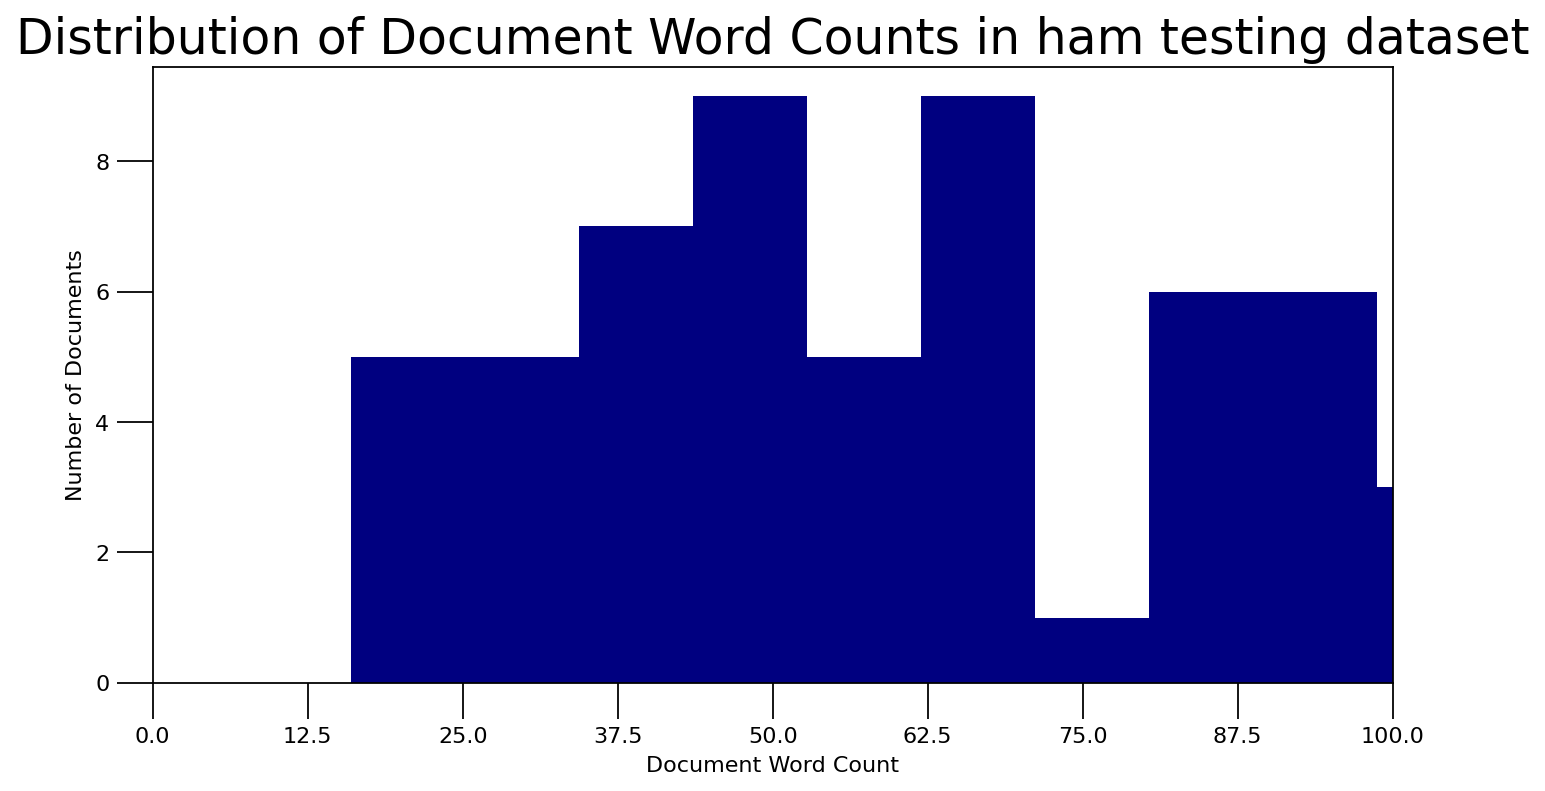

In [157]:
ham_test_doc_lens = [len(d) for d in ham_test_df_dominant_topic.Text]
plt.figure(figsize=(10,5), dpi=160)
plt.hist(ham_test_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in ham testing dataset', fontdict=dict(size=22))
plt.show()

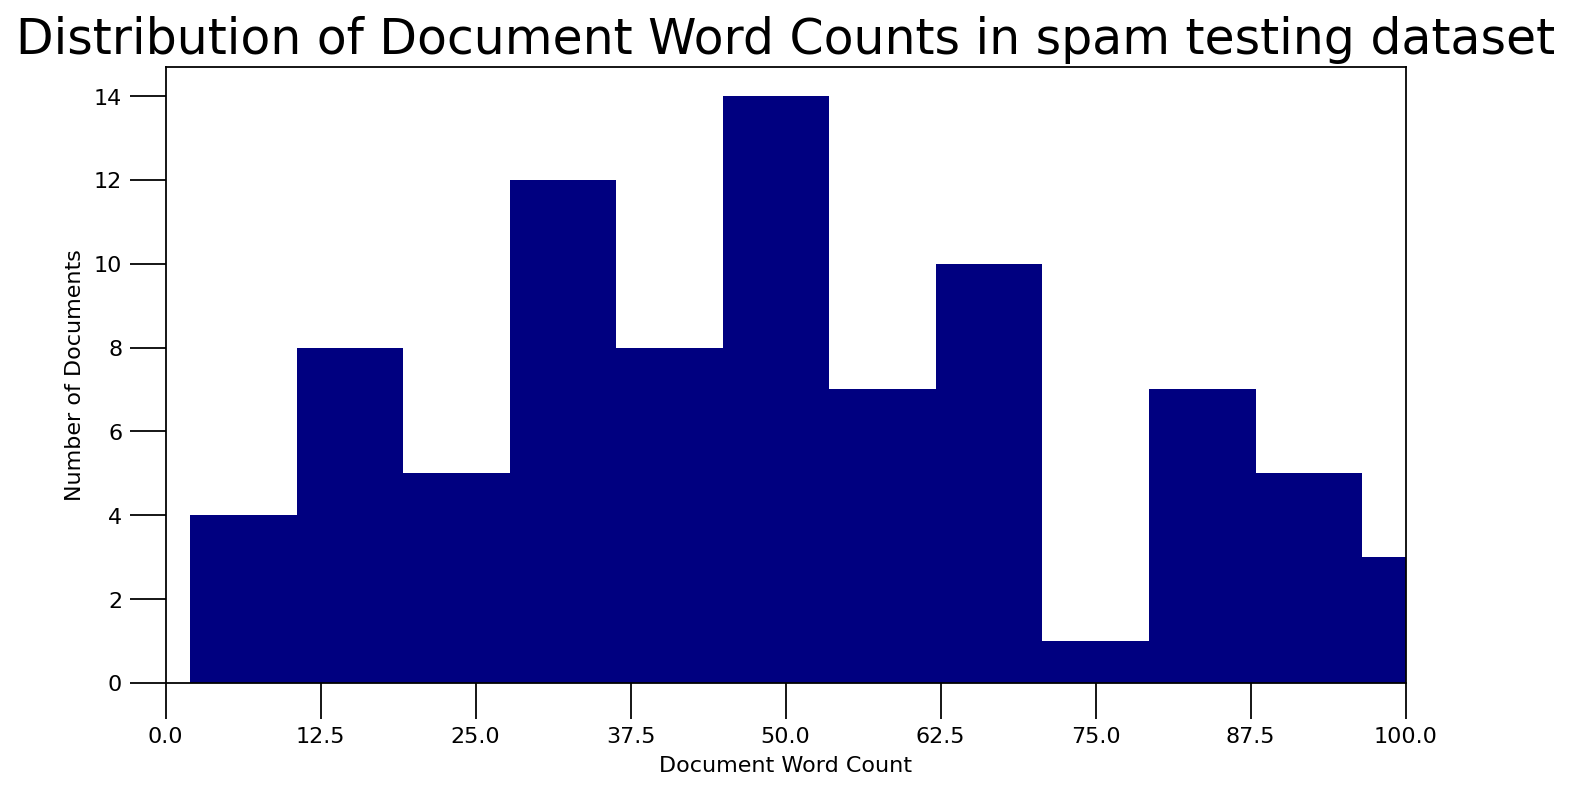

In [158]:
spam_test_doc_lens = [len(d) for d in spam_test_df_dominant_topic.Text]
plt.figure(figsize=(10,5), dpi=160)
plt.hist(spam_test_doc_lens, bins = 100, color='navy')

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts in spam testing dataset', fontdict=dict(size=22))
plt.show()

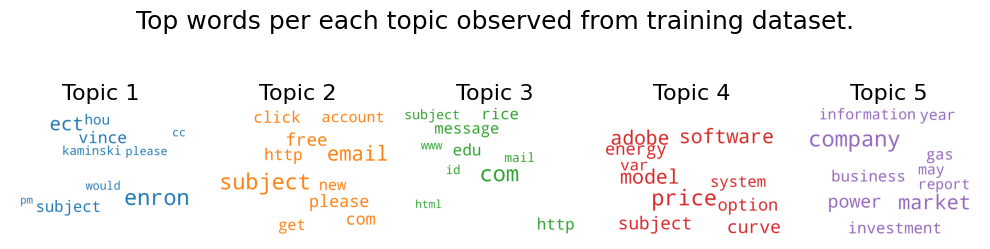

In [159]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = train_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from training dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

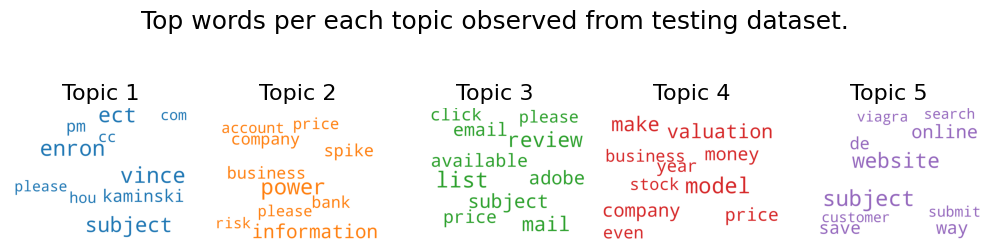

In [160]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = test_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from testing dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

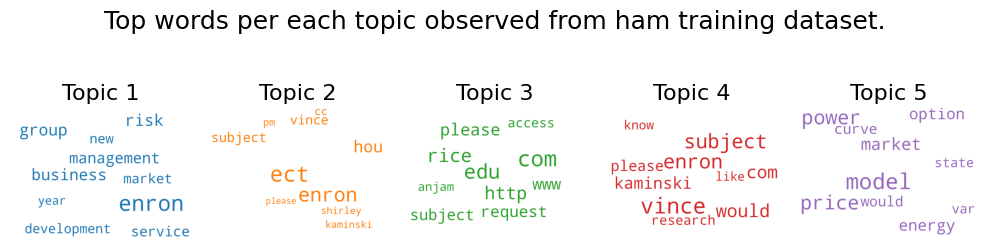

In [161]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ham_train_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from ham training dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

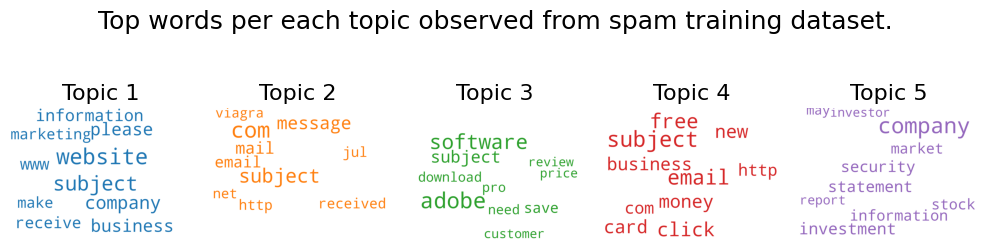

In [162]:
# Wordcloud of Top N words in each topic for training dataset
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = spam_train_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from spam training dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

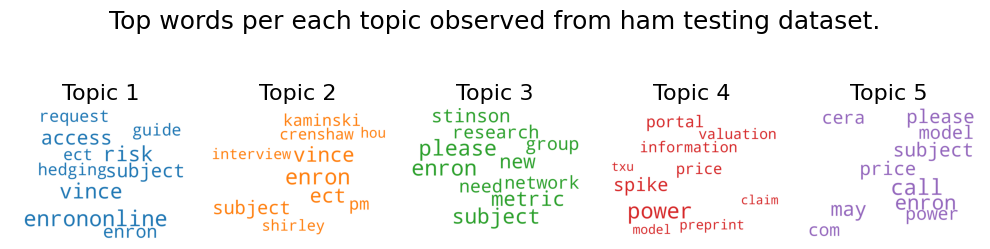

In [163]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ham_test_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from ham testing dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

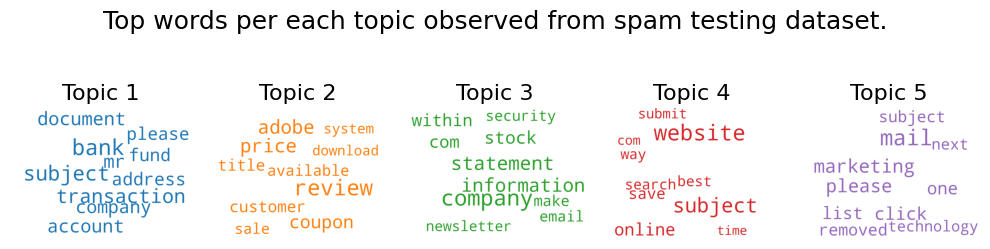

In [164]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = spam_test_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    fig.suptitle("Top words per each topic observed from spam testing dataset.", fontsize=18)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()